# IMAGE FILTERING 

In [1]:
%pip uninstall opencv-python opencv-python-headless -y
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.8/39.5 MB 980.0 kB/s eta 0:00:40
   - -------------------------------------- 1.0/39.5 MB 1.0 MB/s eta 0:00:38
   - -------------------------------------- 1.0/39.5 MB 1.0 MB/s eta 0:00:38
   - -------------------------------------- 1.3/39.5 MB 1.0 MB/s eta 0:00:38
   - -------------------------------------- 1.6/39.5 MB 1.1 MB/s eta 0:00:36
   - -------------------------------------- 1.8/39.5 MB 1.1 MB/s eta 0:00:35
   -- ------------------------------------- 2.4/39.5 MB 1.2 MB/s eta 0:00:32
   -- ------------------------------------- 2.6/39.5 MB 1.2 MB/s eta 0:00:31
   --- ------------------------------------ 3.1/39.5 MB 1.3 MB/s eta 0:00:28
   --- ------------------------------------ 3.4/39.5 MB 1.3 MB/s eta 0:00:28
   --- ----


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Function to load an image and handle errors
def load_image(path):
    image = cv2.imread(path)
    if image is None:
        raise ValueError(f"Error: Unable to load image at '{path}'.")
    return image

# Load two images
img1 = load_image("img1.jpg")
img2 = load_image("img2.jpg")


In [10]:
# Convert images from BGR to RGB (since OpenCV loads images in BGR format)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Function to apply a low-pass filter
def low_pass_filter(img, sigma, size):
    """
    Applies a Gaussian low-pass filter to the input image.
    Args:
        img: Input image.
        sigma: Standard deviation for Gaussian kernel.
        size: Size of the kernel.
    Returns:
        Blurred (low-frequency) version of the input image.
    """
    kernel = cv2.getGaussianKernel(size, sigma)  # Generate a 1D Gaussian kernel
    kernel = np.outer(kernel, kernel)  # Convert the 1D kernel into a 2D Gaussian kernel
    
    if len(img.shape) == 3: # Check if the image has three color channels (RGB)
        low_pass = np.zeros_like(img)
        for i in range(3):  # Apply filter to each channel  # Loop through each color channel (R, G, B) to apply the filter separately
            low_pass[:, :, i] = cv2.filter2D(img[:, :, i], -1, kernel)
    else:
        low_pass = cv2.filter2D(img, -1, kernel)
    
    return low_pass

In [7]:
# Function to apply a high-pass filter by subtracting the low-pass filtered image from the original
def high_pass_filter(img, sigma, size):
    """
    Applies a high-pass filter by subtracting a low-pass filtered version of the image.
    Args:
        img: Input image.
        sigma: Standard deviation for Gaussian kernel.
        size: Size of the kernel.
    Returns:
        High-frequency component of the image.
    """
    low_pass = low_pass_filter(img, sigma, size)
    return cv2.subtract(img, low_pass)

In [ ]:
# Function to create a hybrid image
def create_hybrid_image(img_low, img_high, sigma_low, sigma_high, size_low, size_high):
    """
    Creates a hybrid image by blending low-frequency and high-frequency images.
    Args:
        img_low: Image for low-frequency components.
        img_high: Image for high-frequency components.
        sigma_low: Sigma for low-pass filter.
        sigma_high: Sigma for high-pass filter.
        size_low: Kernel size for low-pass filter.
        size_high: Kernel size for high-pass filter.
    Returns:
        Hybrid image, high-pass filtered image, and the original image.
    """
    # Apply filters
    low_frequencies = low_pass_filter(img_low, sigma_low, size_low)  # Extract low-frequency components from the first image
    high_frequencies = high_pass_filter(img_high, sigma_high, size_high)  # Extract high-frequency components from the second image
    
    # Resize high-frequency image to match low-frequency image size
    high_frequencies_resized = cv2.resize(high_frequencies, (low_frequencies.shape[1], low_frequencies.shape[0]))
    
    # Convert high-frequency image to 3-channel grayscale for blending
    high_frequencies_gray = cv2.cvtColor(cv2.cvtColor(high_frequencies_resized, cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
    
    # Blend the images to create the hybrid image
    hybrid_image = cv2.addWeighted(low_frequencies, 0.5, high_frequencies_gray, 0.5, 0)
    
    return hybrid_image, high_frequencies_gray, img1  # Return hybrid image, high-pass filtered image, and original img1

# Parameters for filtering
sigma_low = 10  # Standard deviation for low-pass filter
sigma_high = 10  # Standard deviation for high-pass filter
kernel_size_low = 21  # Size of the kernel for low-pass filter
kernel_size_high = 21  # Size of the kernel for high-pass filter

# Generate the hybrid image and get high-frequency grayscale image
hybrid_img, high_frequencies_gray, original_img = create_hybrid_image(img1, img2, sigma_low, sigma_high, kernel_size_low, kernel_size_high)


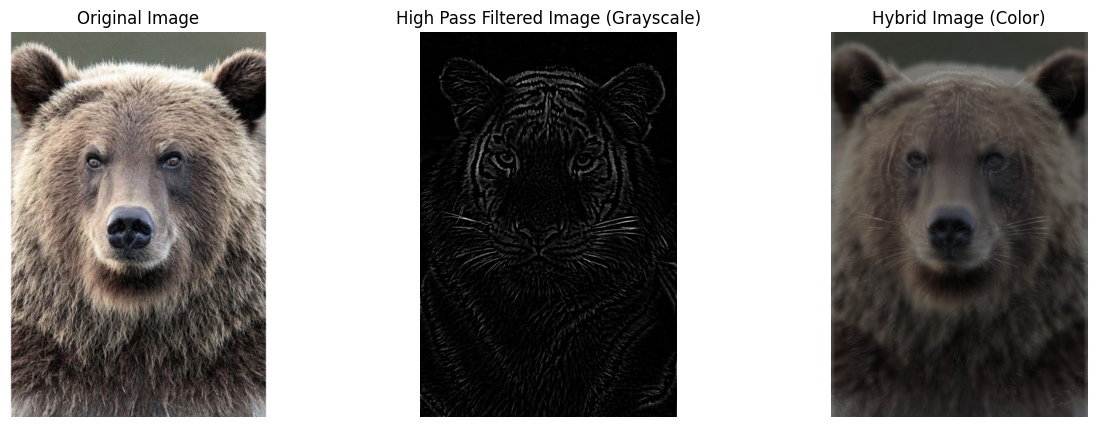

In [11]:
# Display results
plt.figure(figsize=(15, 5))  # Create a figure with specified size for better visualization

# Show original image
plt.subplot(1, 3, 1)  # Create the first subplot for the original image
plt.imshow(original_img)  # Display the original image
plt.title("Original Image")  # Set title for the first image
plt.axis("off")  # Remove axis labels for a cleaner display

# Show high-pass filtered image in grayscale
plt.subplot(1, 3, 2)  # Create the second subplot for the high-pass filtered image
plt.imshow(cv2.cvtColor(high_frequencies_gray, cv2.COLOR_RGB2GRAY), cmap="gray")  # Convert high-pass filtered image to grayscale and display it
plt.title("High Pass Filtered Image (Grayscale)")  # Set title for the high-pass filtered image
plt.axis("off")

# Show hybrid image
plt.subplot(1, 3, 3)  # Create the third subplot for the hybrid image
plt.imshow(hybrid_img)  # Display the final hybrid image
plt.title("Hybrid Image (Color)")  # Set title for the hybrid image
plt.axis("off")

plt.show()  # Display all subplots

